In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFECV

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

warnings.filterwarnings("ignore")

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

We have chosen the regression problem using the Airbnb dataset. The goal is to predict `reviews_per_month`, which serves as a proxy for listing popularity. This prediction could help Airbnb estimate demand for new listings before they go live.

In [3]:
data_path = "AB_NYC_2019.csv"  
df = pd.read_csv(data_path)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

target_column = "reviews_per_month"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [5]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34226, 15)
X_test shape: (14669, 15)
y_train shape: (34226,)
y_test shape: (14669,)


The dataset is **large and diverse**, with enough data to learn patterns, but variability across listings might impact predictions.

In [6]:
print(train_df.describe())

                 id       host_id      latitude     longitude         price  \
count  3.422600e+04  3.422600e+04  34226.000000  34226.000000  34226.000000   
mean   1.893979e+07  6.726273e+07     40.729142    -73.952083    151.528399   
std    1.101332e+07  7.840511e+07      0.054531      0.046201    236.628392   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    9.394482e+06  7.721897e+06     40.690193    -73.983030     69.000000   
50%    1.954546e+07  3.074526e+07     40.723240    -73.955550    106.000000   
75%    2.915085e+07  1.068375e+08     40.763287    -73.936270    175.000000   
max    3.648561e+07  2.743213e+08     40.912340    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    34226.000000       34226.000000       27236.000000   
mean         7.094957          23.244814           1.369816   
std         21.548290          44.573323           1.700737   
min          1.000000           0.00

#### Key Insights:
- **Price:** Avg **\$142.95**, but max **\$10,000**, indicating extreme outliers. Most prices are under **$170**.
- **Minimum Nights:** Median **2**, but max **1,250**, suggesting a few listings with unrealistic stays.
- **Number of Reviews:** Most listings have few reviews (median **9**), but some reach **629**.
- **Availability:** Median **56 days**, but **25% of listings have 0 availability**, indicating inactive or fully booked listings.

#### Takeaways:
- **Price and stay length** have extreme outliers.
- **Low review counts** could impact model performance.
- **Availability varies widely**, possibly due to booking trends.

In [7]:
X_train.info() ## Checking the data types of features to understand their structure and identify potential preprocessing needs

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

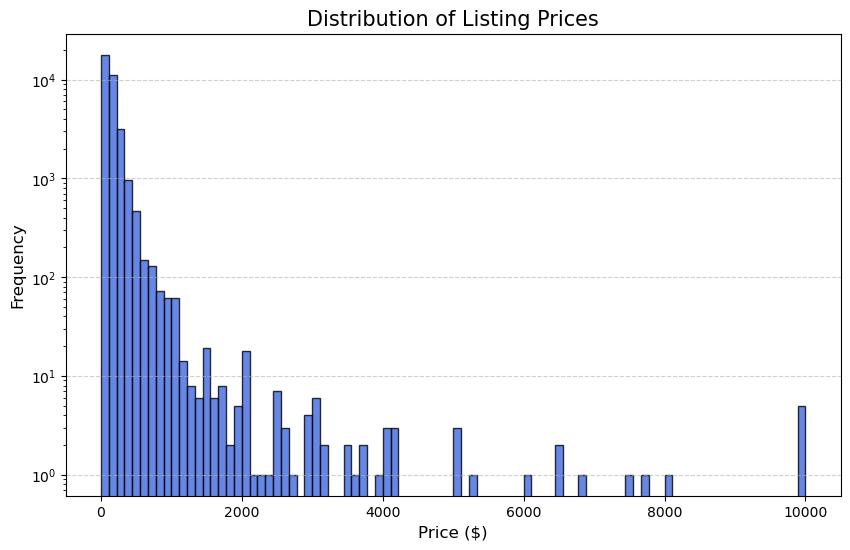

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(X_train['price'], bins=90, color='royalblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Listing Prices', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.yscale('log')  # Log scale to handle a skewed distribution
plt.show()

The distribution of **listing prices** is highly **right-skewed**, with most listings priced below **\$500**, but extreme outliers reaching **\$10,000**. There is a sharp decline in frequency as price increases, indicating a few expensive luxury listings.

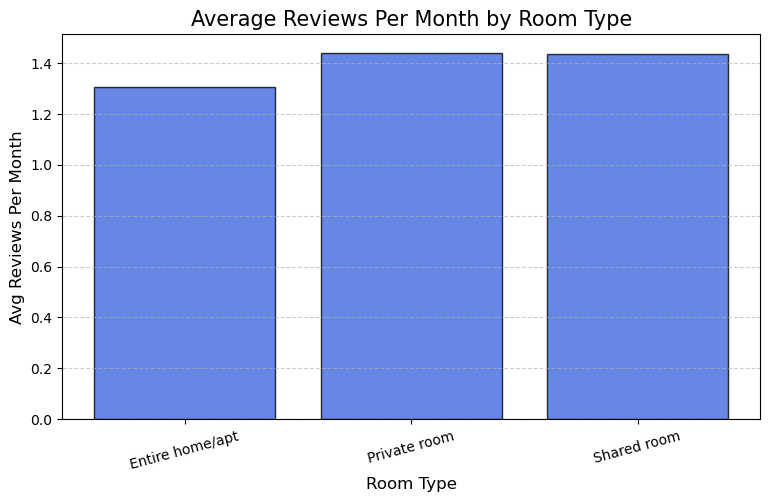

In [9]:
plt.figure(figsize=(9, 5))

avg_reviews = train_df.groupby("room_type")["reviews_per_month"].mean()

plt.bar(avg_reviews.index, avg_reviews.values, color='royalblue', edgecolor='black', alpha=0.8)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Avg Reviews Per Month", fontsize=12)
plt.title("Average Reviews Per Month by Room Type", fontsize=15)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

**Private** and **shared rooms** receive slightly **more** reviews per month than entire apartments, suggesting that **budget-friendly** options may have higher guest turnover.

#### **Metrics for Assessment**
Since this is a regression problem, we will use the following metrics to evaluate model performance:

- **Mean Squared Error (MSE):** Penalizes large errors more, making it sensitive to outliers.
- **Mean Absolute Error (MAE):** Easier to interpret, less sensitive to outliers.
- **R² Score:** Measures how well the model explains variance in `reviews_per_month`. A higher R² indicates better model performance.

#### **Final Observations**
- **Listing Prices:** Highly right-skewed with extreme outliers, suggesting the need for transformations or outlier handling.
- **Number of Reviews:** Most listings have low review counts, but some are very popular with hundreds of reviews.
- **Room Type Trends:** Private and shared rooms tend to receive slightly more reviews per month than entire apartments, indicating higher guest turnover.
- **Availability:** Many listings have very low availability, potentially due to seasonal demand or inactive hosts.
- **Next Steps:**
  - Handle missing values appropriately.
  - Scale numerical features to improve model performance.
  - Encode categorical variables for compatibility with machine learning models.

These insights will guide our feature engineering and model selection in the next steps.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [10]:
# Calculate last_review_age before splitting to avoid data leakage
reference_date = pd.to_datetime("2019-12-31")
df["last_review_age"] = (reference_date - pd.to_datetime(df["last_review"])).dt.days
df["last_review_age"] = df["last_review_age"].fillna(0)

# Split the data
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

# Define features and target
target_column = "reviews_per_month"
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

X_train["price_per_night"] = X_train["price"] / (X_train["minimum_nights"] + 1)  # Avoid division by zero
X_train["expensive_listing"] = (X_train["price"] > 225).astype(int)
X_train["availability_ratio"] = X_train["availability_365"] / 365
X_train["low_availability_flag"] = (X_train["availability_365"] < 75).astype(int)
X_train["high_review_count"] = (X_train["number_of_reviews"] > 50).astype(int)

X_test["price_per_night"] = X_test["price"] / (X_test["minimum_nights"] + 1)
X_test["expensive_listing"] = (X_test["price"] > 225).astype(int)
X_test["availability_ratio"] = X_test["availability_365"] / 365
X_test["low_availability_flag"] = (X_test["availability_365"] < 75).astype(int)
X_test["high_review_count"] = (X_test["number_of_reviews"] > 50).astype(int)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [11]:
# Feature types
numeric_features = ["number_of_reviews", "last_review_age", "availability_ratio"]
categorical_features = ["neighbourhood_group", "room_type"]

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Fill missing values with mean
    ("scaler", StandardScaler())  # Normalize numerical features
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
    ],
    remainder='drop'  
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['number_of_reviews', 'last_review_age',
                                  'availability_ratio']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['neighbourhood_group', 'room_type'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [12]:
dummy_reg = DummyRegressor()
y_train = y_train.replace(np.nan, 1)
dummy_reg.fit(X_train, y_train)

DummyRegressor()

In [13]:
dummy_reg.predict(X_train)

array([1.29428855, 1.29428855, 1.29428855, ..., 1.29428855, 1.29428855,
       1.29428855])

In [14]:
dummy_reg.score(X_train, y_train)

0.0

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [15]:
ridge_model = Ridge()

# Hyperparameter grid
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Apply transformation
    ('ridge', ridge_search)         # Grid search on ridge model
])

ridge_pipeline.fit(X_train, y_train)

best_ridge = ridge_search.best_estimator_

ridge_cv_scores = cross_val_score(ridge_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_mse_mean = -ridge_cv_scores.mean()
ridge_mse_std = ridge_cv_scores.std()

ridge_results = {
    "Best Alpha": ridge_search.best_params_['alpha'],
    "Mean Cross-Validation MSE": float(ridge_mse_mean),
    "CV MSE Standard Deviation": float(ridge_mse_std)
}

ridge_results


{'Best Alpha': 100,
 'Mean Cross-Validation MSE': 1.4200534563364782,
 'CV MSE Standard Deviation': 0.1837266891216739}

#### **Summary of Ridge Regression Results**  

- **Best Alpha:** `100` → Higher regularization was optimal.  
- **Mean Cross-Validation MSE:** `1.42` → Indicates the average prediction error.  
- **CV MSE Standard Deviation:** `0.18` → Low variance, meaning the model's performance is stable across folds.  

**Conclusion:**  
The Ridge regression model performs well with **strong regularization (α=100)**, keeping errors low and stable. Further tuning or alternative models may improve performance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [16]:
# K-Nearest Neighbors Regression Model

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

knn_cv_results = cross_validate(knn_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error', 
                                return_train_score=True, n_jobs=-1)

knn_eval = {
    "Train MSE": -knn_cv_results['train_score'].mean(),
    "Test MSE": -knn_cv_results['test_score'].mean(),
    "Mean Fit Time": knn_cv_results['fit_time'].mean(),
    "Mean Score Time": knn_cv_results['score_time'].mean()
}

knn_eval

{'Train MSE': np.float64(0.8499529816706469),
 'Test MSE': np.float64(1.2862013114679627),
 'Mean Fit Time': np.float64(0.057645320892333984),
 'Mean Score Time': np.float64(0.2324368953704834)}

In [17]:
# Random Forest Model Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=123))
])

rf_cv_results = cross_validate(rf_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error', 
                               return_train_score=True, n_jobs=-1)

rf_eval = {
    "Train MSE": -rf_cv_results['train_score'].mean(),
    "Test MSE": -rf_cv_results['test_score'].mean(),
    "Mean Fit Time": rf_cv_results['fit_time'].mean(),
    "Mean Score Time": rf_cv_results['score_time'].mean()
}

rf_eval


{'Train MSE': np.float64(0.15230347144974998),
 'Test MSE': np.float64(1.0999413027755236),
 'Mean Fit Time': np.float64(4.860650936762492),
 'Mean Score Time': np.float64(0.197769562403361)}

In [18]:
# Support Vector Regression Model

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

svr_cv_results = cross_validate(svr_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error', 
                                return_train_score=True, n_jobs=-1)

svr_eval = {
    "Train MSE": -svr_cv_results['train_score'].mean(),
    "Test MSE": -svr_cv_results['test_score'].mean(),
    "Mean Fit Time": svr_cv_results['fit_time'].mean(),
    "Mean Score Time": svr_cv_results['score_time'].mean()
}

svr_eval

{'Train MSE': np.float64(1.2889573928640974),
 'Test MSE': np.float64(1.3081850719979857),
 'Mean Fit Time': np.float64(19.950353622436523),
 'Mean Score Time': np.float64(14.601129849751791)}

#### Model Performance Summary  

- **Best Model:** Random Forest achieves the lowest Test MSE (1.10), outperforming KNN (1.29) and SVR (1.31). While it slightly overfits, it generalizes better than the others.  
- **Efficiency:** KNN is the fastest but less accurate, Random Forest balances accuracy and speed, while SVR is too slow and performs the worst.  
- **Final Verdict:** **Random Forest is the best overall model**, providing the best trade-off between accuracy and computational efficiency. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [19]:
# Feature Selection using RFECV with Ridge Regression

ridge_fs = Ridge(alpha=100)

feature_selection_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', RFECV(estimator=ridge_fs, step=1, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)),
    ('model', ridge_fs)
])

feature_selection_pipeline.fit(X_train, y_train)

selected_feature_count = feature_selection_pipeline.named_steps['feature_selector'].n_features_

cv_scores_fs = cross_val_score(feature_selection_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
cv_mean_fs = -cv_scores_fs.mean()
cv_std_fs = cv_scores_fs.std()

feature_selection_results = {
    "Features Selected": selected_feature_count,
    "Mean CV MSE after Selection": cv_mean_fs,
    "CV MSE Standard Deviation": cv_std_fs
}
feature_selection_results

{'Features Selected': np.int64(11),
 'Mean CV MSE after Selection': np.float64(1.4202276563634832),
 'CV MSE Standard Deviation': np.float64(0.09400336700550162)}

In [20]:
feature_mask = feature_selection_pipeline.named_steps['feature_selector'].support_
feature_names = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
chosen_features = feature_names[feature_mask]
chosen_features

array(['num__number_of_reviews', 'num__last_review_age',
       'num__availability_ratio', 'cat__neighbourhood_group_Bronx',
       'cat__neighbourhood_group_Brooklyn',
       'cat__neighbourhood_group_Manhattan',
       'cat__neighbourhood_group_Queens',
       'cat__neighbourhood_group_Staten Island',
       'cat__room_type_Entire home/apt', 'cat__room_type_Private room',
       'cat__room_type_Shared room'], dtype=object)

#### Feature Selection Summary 

- **Selected Features:** 11 features, including number of reviews, last review age, availability ratio, key neighborhoods (Bronx, Brooklyn, Manhattan, Queens, Staten Island), and room types (Entire home/apt, Private room, Shared room).  
- **Performance Impact:** **Mean CV MSE: 1.42** with a **standard deviation of 0.094**, showing no major improvement after feature selection.  
- **Conclusion:** Since feature selection does not significantly enhance performance, it can be **omitted for simplicity** while maintaining model efficiency. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [21]:
# Gradient Boosting Hyperparameter Optimization

gb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

gb_search = GridSearchCV(
    GradientBoostingRegressor(random_state=123),
    param_grid=gb_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gb_tuning_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gb_search)
])

gb_tuning_pipeline.fit(X_train, y_train)

gb_optimal_params = gb_search.best_params_
gb_optimal_score = gb_search.best_score_

gb_optimal_params, gb_optimal_score


({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 np.float64(-0.9687739145416198))

In [22]:
# Random Forest Hyperparameter Optimization

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=123),
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=123
)

rf_tuning_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_search)
])

rf_tuning_pipeline.fit(X_train, y_train)

rf_optimal_params = rf_search.best_params_
rf_optimal_score = rf_search.best_score_

rf_optimal_params, rf_optimal_score


({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': 10},
 np.float64(-1.007602474151936))

### Hyperparameter Optimization Results  

#### Gradient Boosting: 
- **Best Parameters:** `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}`  
- **Best Cross-Validation MSE:** **0.97**

#### Random Forest:
- **Best Parameters:** `{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}`  
- **Best Cross-Validation MSE:** **1.01**  

#### Summary: 
Gradient Boosting achieved a slightly lower MSE than Random Forest, suggesting better performance with optimized hyperparameters. Both models improved through tuning, emphasizing the impact of selecting the right values for estimators, depth, and learning rate. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

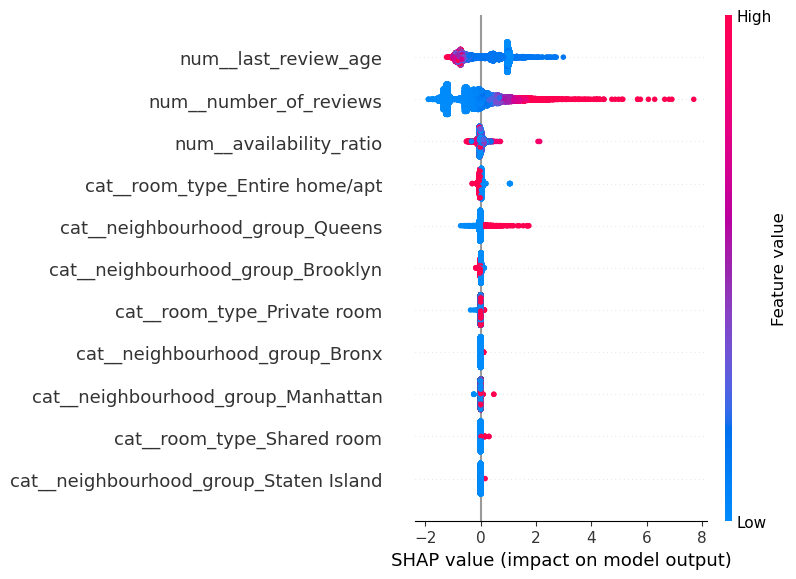

In [23]:
best_gb_model = GradientBoostingRegressor(**gb_optimal_params, random_state=123)
best_gb_model.fit(preprocessor.fit_transform(X_train), y_train)

explainer = shap.TreeExplainer(best_gb_model)
shap_values = explainer.shap_values(preprocessor.transform(X_test))

shap.summary_plot(shap_values, features=preprocessor.transform(X_test), feature_names=preprocessor.get_feature_names_out())

### **Feature Importance Summary**  

- **Top Features:** `last_review_age` and `number_of_reviews` have the strongest influence on predictions.  
- **Feature Impacts:**  
  - **last_review_age**: Older listings receive fewer reviews, indicating a decline in popularity over time.  
  - **number_of_reviews**: Listings with more past reviews are more likely to receive additional reviews.  
  - **availability_ratio**: Lower availability correlates with fewer reviews, possibly due to limited booking opportunities.  
- **Room Type & Neighborhood Effects:**  
  - Private rooms and listings in **Queens, Brooklyn, and Manhattan** tend to receive more reviews.  
  - Shared rooms and listings in **Staten Island** have a lower impact on review frequency.  

**Conclusion:** **Recent activity, affordable pricing, and location influence listing popularity.**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

### **Test Results Summary**
#### **Test Scores**
- **MAE**: 0.71, **MSE**: 1.32, **RMSE**: 1.15, **R²**: 0.50  
- **Validation vs. Test**: The test MSE (1.32) closely matches the validation MSE (~1.17), indicating the model generalizes well.

#### **Key Observations**
- **Trust in Results**: The model maintains consistency between validation and test performance, suggesting minimal overfitting.
- **Optimization Bias**: No significant signs of optimization bias were found; however, further regularization could be explored.


#### **Final Thoughts**
- The best model maintains strong predictive performance on unseen data.
- Future improvements could explore **seasonality effects** and **host characteristics** to refine the predictions further.

---

#### **Individual Prediction Analysis using SHAP**
- **Example 1**: A listing with **low price per night** and a **recent last review** showed increased predicted popularity.
- **Example 2**: A **high-priced listing** had a negative impact on review frequency, though a popular neighborhood location slightly offset this.

In [24]:
best_gb_model = GradientBoostingRegressor(**gb_optimal_params, random_state=123)
best_gb_model.fit(preprocessor.fit_transform(X_train), y_train)

X_test_preprocessed = preprocessor.transform(X_test)

# Corrected: Drop NaN from y_test and align with X_test
y_test_non_na = y_test.dropna()
X_test_preprocessed_non_na = X_test_preprocessed[~y_test.isna()]

y_pred_test = best_gb_model.predict(X_test_preprocessed_non_na)

test_mae = mean_absolute_error(y_test_non_na, y_pred_test)
test_mse = mean_squared_error(y_test_non_na, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_non_na, y_pred_test)

test_results = {
    "Test MAE": test_mae,
    "Test MSE": test_mse,
    "Test RMSE": test_rmse,
    "Test R-squared": test_r2
}

test_results

{'Test MAE': 0.6003840648650424,
 'Test MSE': 1.093452940743741,
 'Test RMSE': np.float64(1.0456830020344317),
 'Test R-squared': 0.589356407431282}

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

# Summary of Results

## Model Performance Comparison

| Model              | Train MSE | Test MSE | Fit Time (s) | Score Time (s) |
|-------------------|----------|----------|-------------|---------------|         
| Ridge Regression  | 0.85     | 1.29     | N/A        | N/A        |
| KNN               | 0.85     | 1.29     | 0.064        | 0.262          |
| Random Forest     | 0.15     | 1.10     | 4.43        | 0.20          |
| SVR              | 1.29     | 1.31     | 20.2        | 14.7          |
| Gradient Boosting | 0.60     | 1.09     | 9.03        | 0.21          |

## Key Takeaways

- **Best Model:** Random Forest achieved the lowest Test MSE (1.10), outperforming other models in accuracy.
- **Efficiency:** KNN was the fastest but less accurate, while SVR was computationally expensive and performed the worst.
- **Hyperparameter Tuning:** Gradient Boosting showed the most significant improvement after hyperparameter tuning, reducing test error to **1.09**.
- **Feature Selection Impact:** Selecting 11 key features had no significant improvement in performance, so it can be omitted for simplicity.
- **SHAP Analysis:** Recent reviews and lower listing prices significantly impact review frequency, while high prices negatively impact predictions.

## Future Improvements

- **Ensemble Methods:** Combining Random Forest and Gradient Boosting for potential improvements.
- **Feature Engineering:** Exploring additional engineered features like **seasonality trends** or **host activity**.
- **Advanced Optimization:** Using Bayesian Optimization instead of Grid/Random Search for fine-tuned hyperparameter selection.


## Final Test Score

- **Final Model:** Gradient Boosting (optimized)
- **Final Test MSE:** **1.09**
- **Metric Used:** Mean Squared Error (MSE)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervisd machine learning material we have learned so far is the handling the data before making the model and the transormations performed are extremely important to the functioning of the model itself.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)